In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

/Users/ytchou/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/ytchou/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
class DataGenerator:
    def __init__(self, p1, p2):
        self.p1 = p1 # probability to click for group 1
        self.p2 = p2
        
    def next(self):
        click1 = 1 if (np.random.random() < self.p1) else 0 
        click2 = 1 if (np.random.random() < self.p2) else 0 
        return(click1, click2)
    
def get_p_value(T):
    det = T[0,0] * T[1,1] - T[0,1] * T[1,0]
    c2 = float(det) / T[0].sum() * det / T[1].sum() * T.sum() / T[:,0].sum() / T[:,1].sum()
    p = 1 - chi2.cdf(x = c2, df = 1)
    return(p)

In [5]:
def run_experiment(p1, p2, N):
    data = DataGenerator(p1, p2)
    p_values = np.empty(N)
    T = np.zeros((2,2)).astype(np.float32)
    for i in range(N):
        c1, c2 = data.next()
        T[0,c1] += 1
        T[1,c2] += 1
        if i < 10: # make sure that the demoninator of the get_p_value function will not be zero
            p_values[i] = None
        else:
            p_values[i] = get_p_value(T)
    plt.plot(p_values)
    plt.plot(np.ones(N) * 0.05) # Assume that the significance level is 0.05
    plt.show()
            

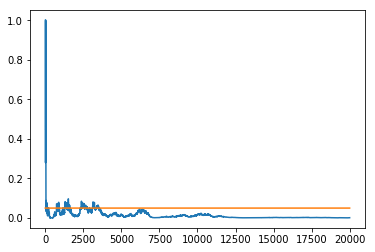

In [8]:
run_experiment(0.1, 0.11, 20000)

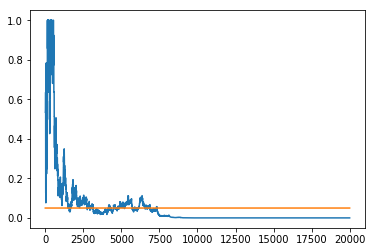

In [15]:
run_experiment(0.1, 0.11, 20000)

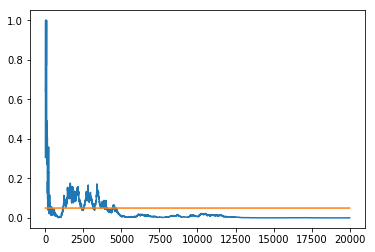

In [17]:
run_experiment(0.1, 0.11, 20000)

We can see that p_value is problematic, since each time you can get different results.

What's more, you can see that at one point it's significant, but after that it goes back to insignificant again!

### What if you want to do comparisons among more than two groups?

#### You need to use Bonferroni Correction.

<img src="Bonferroni-correction-method-equation.jpg">